In [162]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import sys, random
from problem import *
from utils import *
from math import inf
from itertools import permutations

# Explanation and Pseudocode to be done

In [163]:
G = nx.complete_graph(25)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)

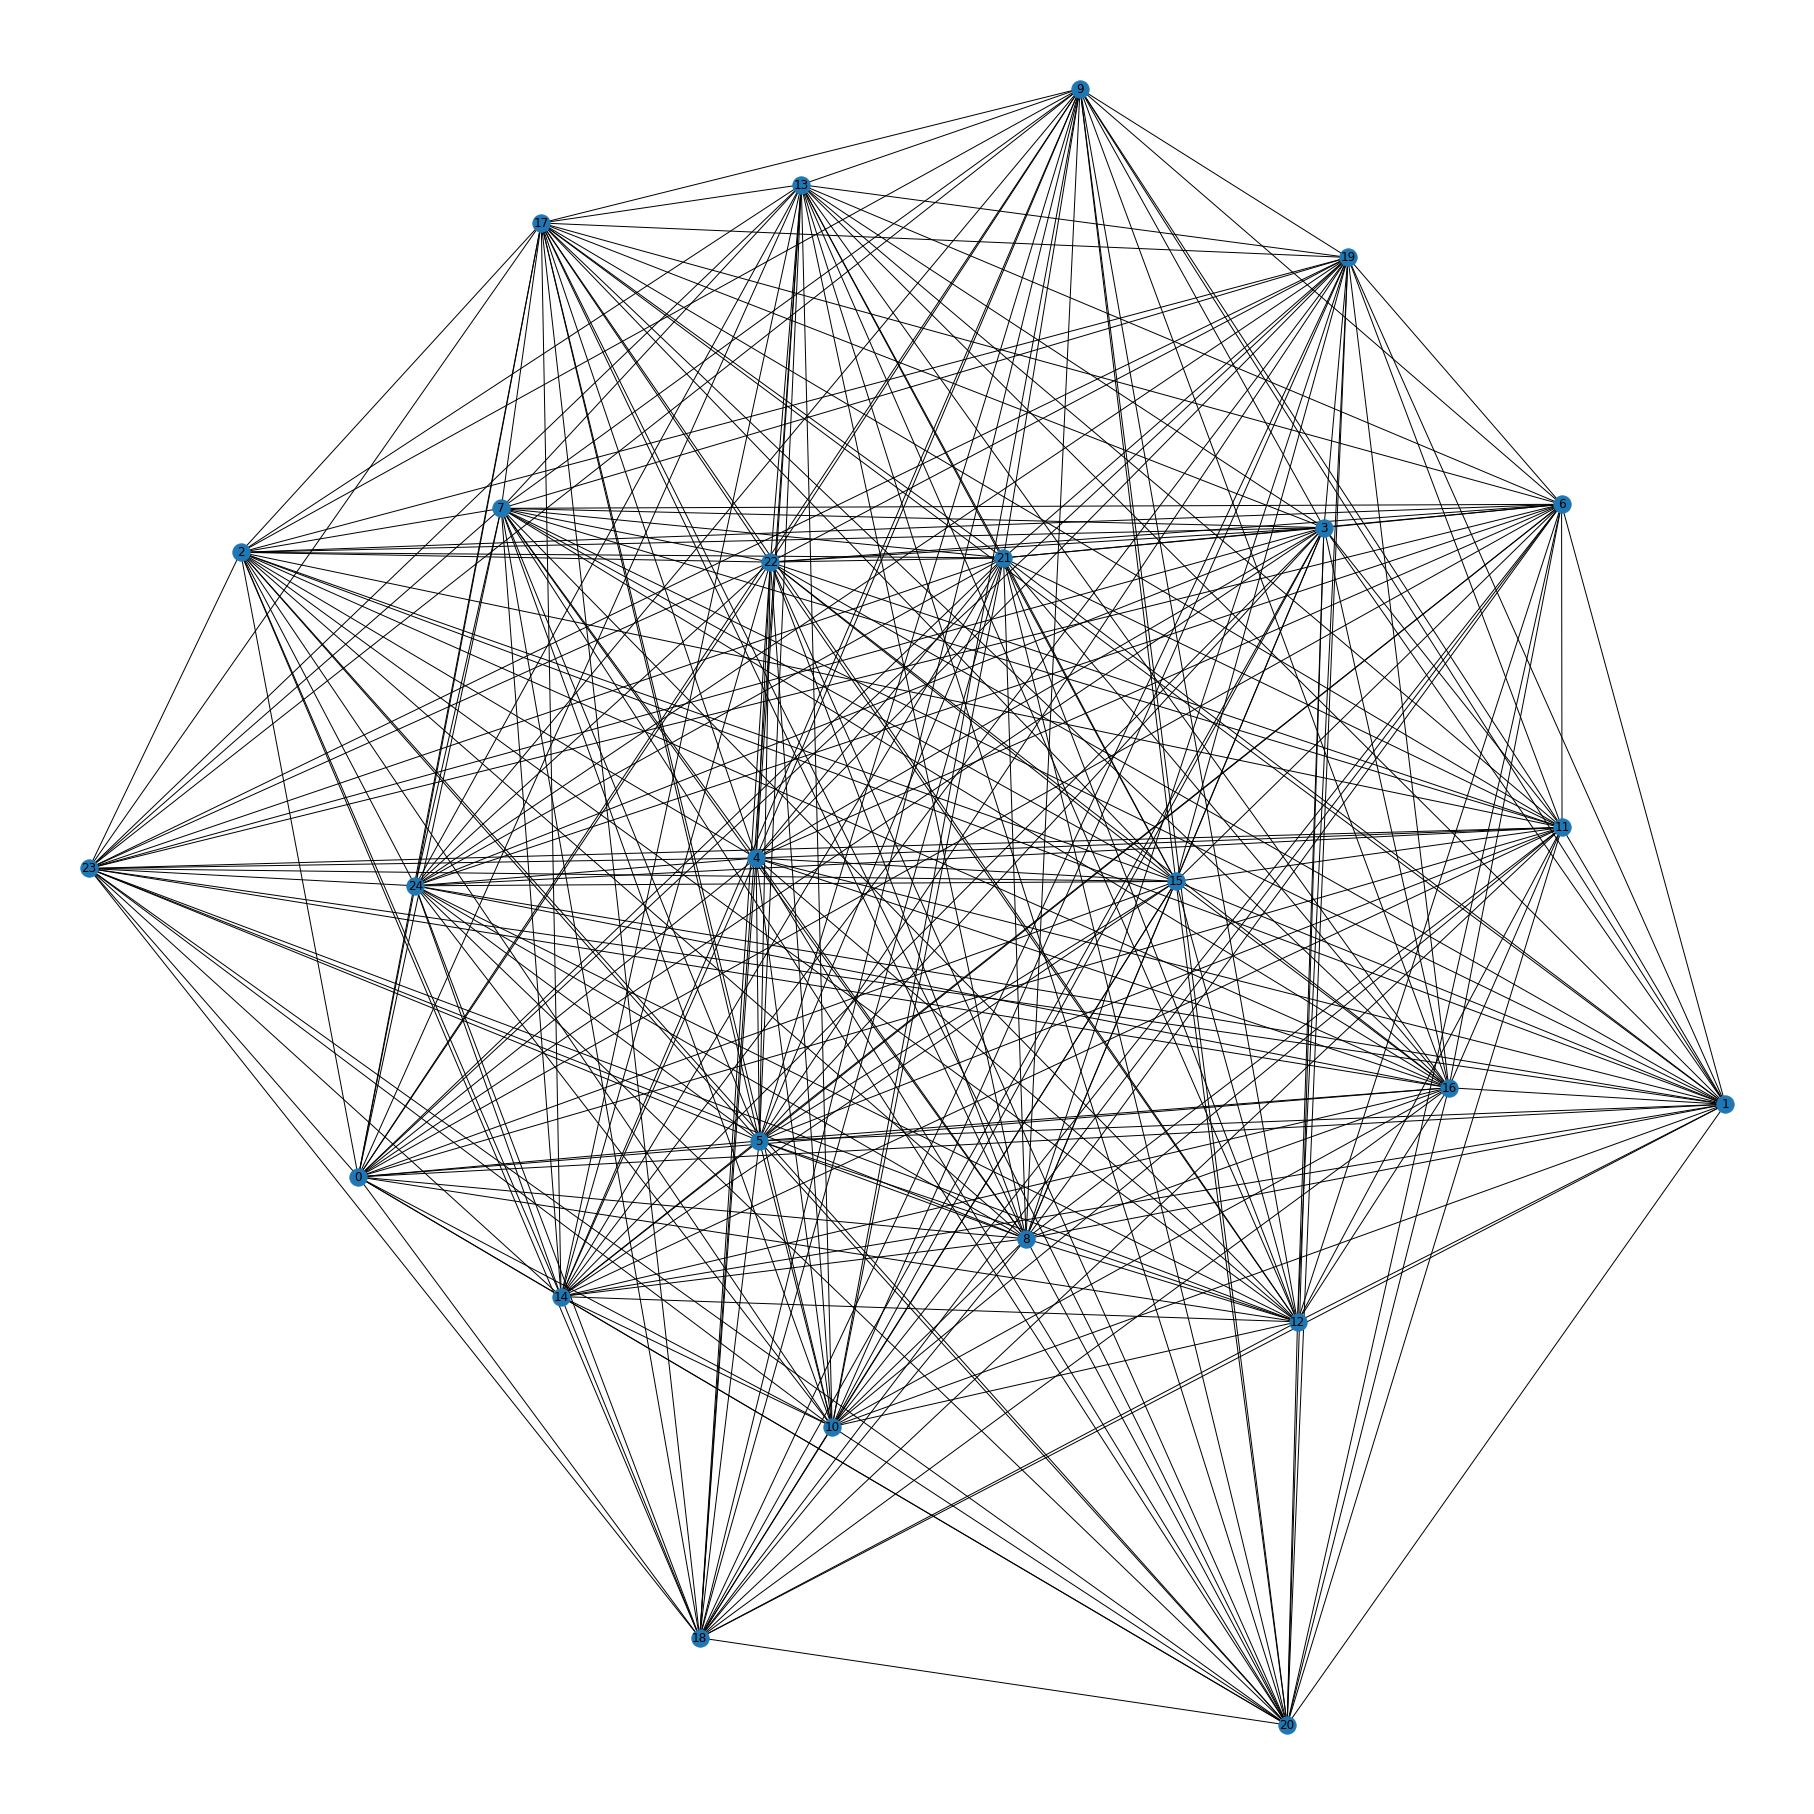

In [164]:
plt.figure(figsize=(25,25)) 
nx.draw(G, with_labels=True)
plt.show()

In [165]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24))

In [166]:
def random_permutation(iterable, r=None, number_of_perms = 50):
    "Random selection from itertools.permutations(iterable, r)"
    for i in range(number_of_perms):
        pool = tuple(iterable)
        r = len(pool) if r is None else r
        yield tuple(random.sample(pool, r))

In [167]:
def PMX_crossover(p1, p2):
    p1 = list(p1); p2 = list(p2)
    total_length = len(p1)
    first_Cross = random.randint(0, total_length // 2)
    second_Cross = random.randint(total_length // 2 + 1, total_length - 1) + 1
    child = [None] * total_length
    subP1 = p1[first_Cross:second_Cross]
    subP2 = p2[first_Cross:second_Cross]
    pairs = list()
    for element in subP2:
        if element not in subP1:
            pairs.append((element, subP1[subP2.index(element)]))
    for pair in pairs:
        second = pair[1]
        if second not in subP2:
            index = p2.index(second)
            child[index] = pair[0]
        else:
            reflect = p1[p2.index(second)]
            # bouncing back and forth
            # to get out of subP2
            while reflect in subP2:
                bounce = reflect
                reflect = p1[p2.index(bounce)]
            child[p2.index(reflect)] = pair[0]
    child[first_Cross:second_Cross] = subP1
    for i in range(total_length):
        if child[i] == None:
            child[i] = p2[i]
    return tuple(child)

In [168]:
def insert_mutation(member):
    member = list(member)    # to deal with list-hashing issue in Python
    length = len(member)
    first_gene = random.randint(0, length - 1)
    second_gene = random.randint(0, length - 1)
    member[first_gene], member[second_gene] = member[second_gene], member[first_gene]
    return tuple(member)

In [169]:
num_of_population = 20

In [170]:
population = [(member, getWeight(G, member)) for member in [*random_permutation(list(G.nodes()),number_of_perms = num_of_population)]]

In [171]:
ngen = 5000

In [172]:
from problem import probability

mutate_probability = 0.6
crossover_probability = 0.7

In [173]:
for generation in range(ngen):
    # 1- we have a sorted pool of 50 random paths with respect to their length
    # 2- mutate a random even number of best paths in population
    # 3- crossover them (PMX)
    # 4- insert half that even number into the pool to keep the population to be 50 members
    # 5- after `ngen` return the best path
    
    # 1-
    sorted(population, key = lambda member : member[1])
    numOfmembers = random_even_number(num_of_population)
    members = population[:numOfmembers]
    # 2-

    for i in range(numOfmembers):
        if probability(mutate_probability):
            mutated_path = insert_mutation(members[i][0])
            members[i] = (mutated_path, getWeight(G, mutated_path))
    
    # so if we will do cross-over for some member
    # it would be with that member and the next best thing
    sorted(members, key = lambda member : member[1])
    
    # 3-
    for j in range(numOfmembers - 1):
        if probability(crossover_probability):
            crossed_over = PMX_crossover(members[j][0], members[j+1][0])
            members[j] = (crossed_over, getWeight(G, tuple(crossed_over)))
    
    population[:numOfmembers] = members
    

The solution we get from here is about 20%-30% more than the optimum value

In [174]:
route, cost = min(population, key = lambda member : member[1])

In [175]:
route

(21,
 19,
 9,
 4,
 22,
 6,
 0,
 8,
 20,
 2,
 7,
 14,
 17,
 23,
 3,
 1,
 10,
 13,
 16,
 11,
 5,
 12,
 24,
 15,
 18)

In [176]:
cost

106